# 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('company.csv')
print(df.shape)
print(list(df.columns))

(495478, 7)
['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice']


In [3]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850.0,536365,25/09/2020,71053,WHITE METAL LANTERN,6,11.187
2,17850.0,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850.0,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850.0,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [4]:
df.tail()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
495473,15804.0,581585,03/10/2021,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,6.435
495474,13113.0,581586,04/10/2021,22061,LARGE CAKE STAND HANGING STRAWBERY,8,9.735
495475,13113.0,581586,04/10/2021,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,4.125
495476,13113.0,581586,04/10/2021,21217,RED RETROSPOT ROUND CAKE TINS,24,29.535
495477,13113.0,581586,04/10/2021,20685,DOORMAT RED RETROSPOT,10,23.364


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    495478 non-null  object 
 2   InvoiceDate  495478 non-null  object 
 3   StockCode    495478 non-null  object 
 4   Description  494024 non-null  object 
 5   Quantity     495478 non-null  int64  
 6   UnitPrice    495478 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 26.5+ MB


In [6]:
df.isna().sum()

CustomerID     133600
InvoiceNo           0
InvoiceDate         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
dtype: int64

In [7]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,361878.000000,495478.000000,495478.000000
mean,15547.871368,8.605486,14.956993
std,1594.402590,227.588756,327.740946
min,12346.000000,-80995.000000,-36504.798000
25%,14194.000000,1.000000,4.125000
50%,15514.000000,3.000000,6.930000
75%,16931.000000,10.000000,13.629000
max,18287.000000,80995.000000,128601.000000


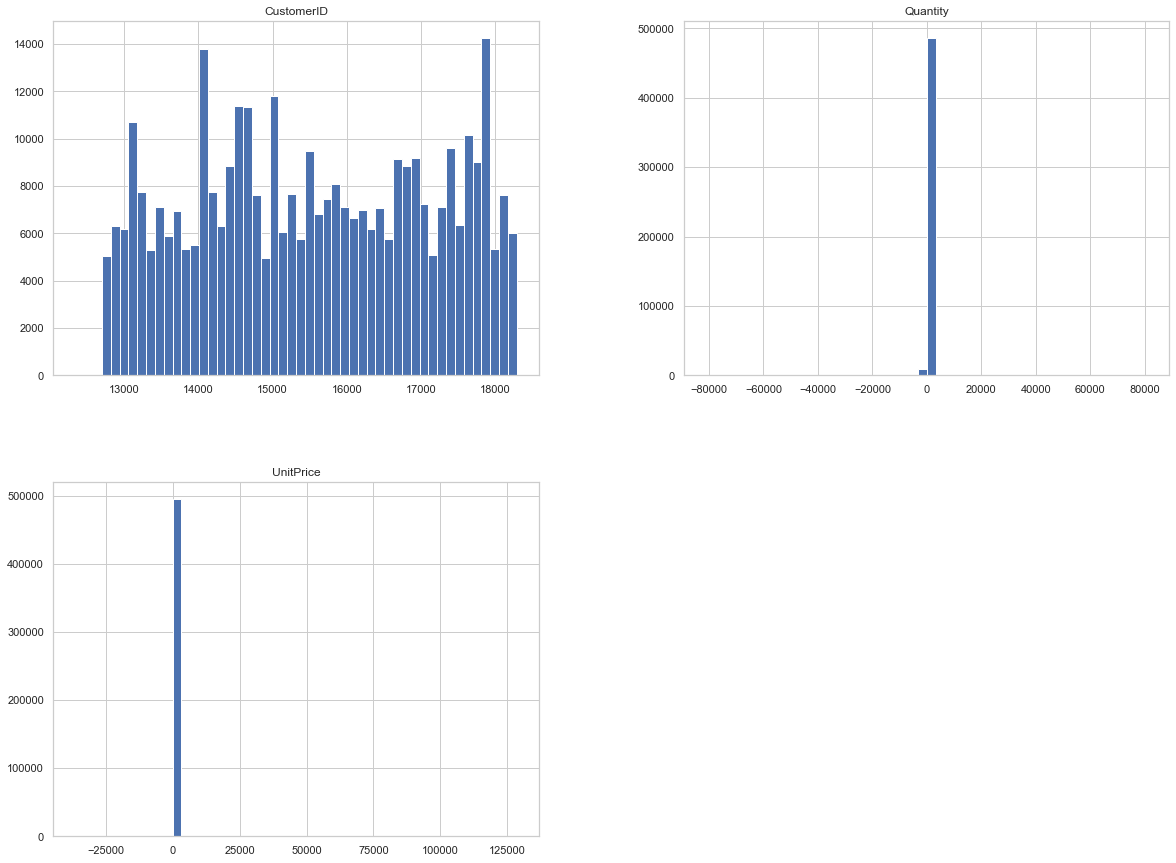

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [9]:
df['Quantity'].describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 9.186e+03]),
 array([-8.09950e+04, -7.28956e+04, -6.47962e+04, -5.66968e+04,
        -4.85974e+04, -4.04980e+04, -3.23986e+04, -2.42992e+04,
        -1.61998e+04, -8.10040e+03, -1.00000e+00]),
 <BarContainer object of 10 artists>)

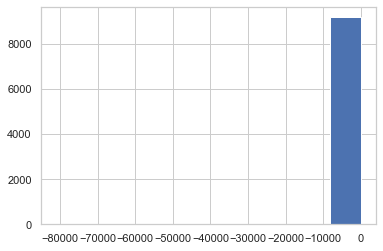

In [10]:
plt.hist(df['Quantity'][df['Quantity']<0])

In [11]:
df['UnitPrice'].describe()

count    495478.000000
mean         14.956993
std         327.740946
min      -36504.798000
25%           4.125000
50%           6.930000
75%          13.629000
max      128601.000000
Name: UnitPrice, dtype: float64

(array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
 array([-36505.298, -36505.198, -36505.098, -36504.998, -36504.898,
        -36504.798, -36504.698, -36504.598, -36504.498, -36504.398,
        -36504.298]),
 <BarContainer object of 10 artists>)

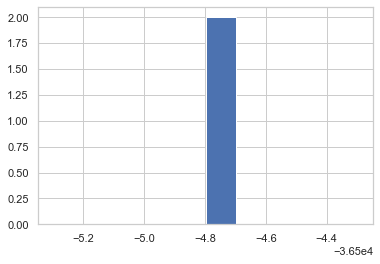

In [12]:
plt.hist(df['UnitPrice'][df['UnitPrice']<0])

In [13]:
# find out correlation between params
df.corr()

,CustomerID,Quantity,UnitPrice
CustomerID,1.000000,-0.000844,-0.000828
Quantity,-0.000844,1.000000,-0.000994
UnitPrice,-0.000828,-0.000994,1.000000


<AxesSubplot:>

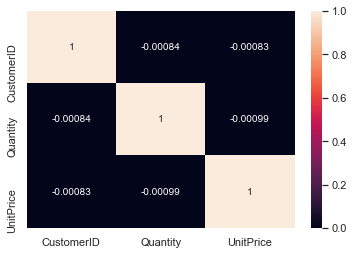

In [14]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preparation

In [15]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    495478 non-null  object 
 2   InvoiceDate  495478 non-null  object 
 3   StockCode    495478 non-null  object 
 4   Description  494024 non-null  object 
 5   Quantity     495478 non-null  int64  
 6   UnitPrice    495478 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 26.5+ MB


In [16]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    361878 non-null  object 
 2   InvoiceDate  361878 non-null  object 
 3   StockCode    361878 non-null  object 
 4   Description  361878 non-null  object 
 5   Quantity     361878 non-null  int64  
 6   UnitPrice    361878 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.1+ MB


In [17]:
df2['Quantity'][df2['Quantity']<=0] = None
df2['Quantity'].describe()

count    354345.000000
mean         12.048913
std         190.428127
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

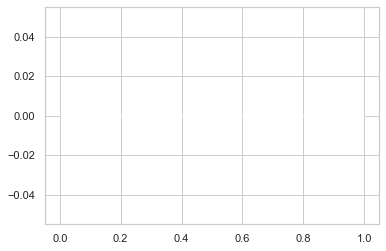

In [18]:
plt.hist(df2['Quantity'][df2['Quantity']<=0])

In [19]:
df2['UnitPrice'][df2['UnitPrice']<=0] = None
df2['UnitPrice'].describe()

count    361854.000000
mean         10.745535
std         233.168329
min           0.003300
25%           4.125000
50%           6.435000
75%          12.375000
max      128601.000000
Name: UnitPrice, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

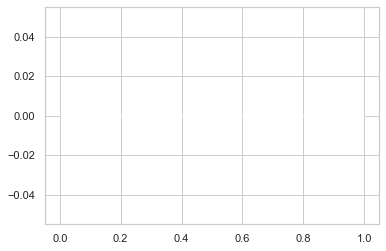

In [20]:
plt.hist(df2['UnitPrice'][df2['UnitPrice']<=0])

In [21]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   354321 non-null  float64
 1   InvoiceNo    354321 non-null  object 
 2   InvoiceDate  354321 non-null  object 
 3   StockCode    354321 non-null  object 
 4   Description  354321 non-null  object 
 5   Quantity     354321 non-null  float64
 6   UnitPrice    354321 non-null  float64
dtypes: float64(3), object(4)
memory usage: 21.6+ MB


In [22]:
df2.drop(['StockCode','Description'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 495477
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   354321 non-null  float64
 1   InvoiceNo    354321 non-null  object 
 2   InvoiceDate  354321 non-null  object 
 3   Quantity     354321 non-null  float64
 4   UnitPrice    354321 non-null  float64
dtypes: float64(3), object(2)
memory usage: 16.2+ MB


In [23]:
df2.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,6.0,8.415
1,17850.0,536365,25/09/2020,6.0,11.187
2,17850.0,536365,25/09/2020,8.0,9.075
3,17850.0,536365,25/09/2020,6.0,11.187
4,17850.0,536365,25/09/2020,6.0,11.187


In [24]:
df2=df2.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'InvoiceNo': 'NUMBER_OF_INVOICE',
                       'InvoiceDate': 'DATE_OF_INVOICE', 'Quantity': 'QUANTITY',
                       'UnitPrice': 'PRICE_OF_UNIT'})
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT
0,17850.0,536365,25/09/2020,6.0,8.415
1,17850.0,536365,25/09/2020,6.0,11.187
2,17850.0,536365,25/09/2020,8.0,9.075
3,17850.0,536365,25/09/2020,6.0,11.187
4,17850.0,536365,25/09/2020,6.0,11.187


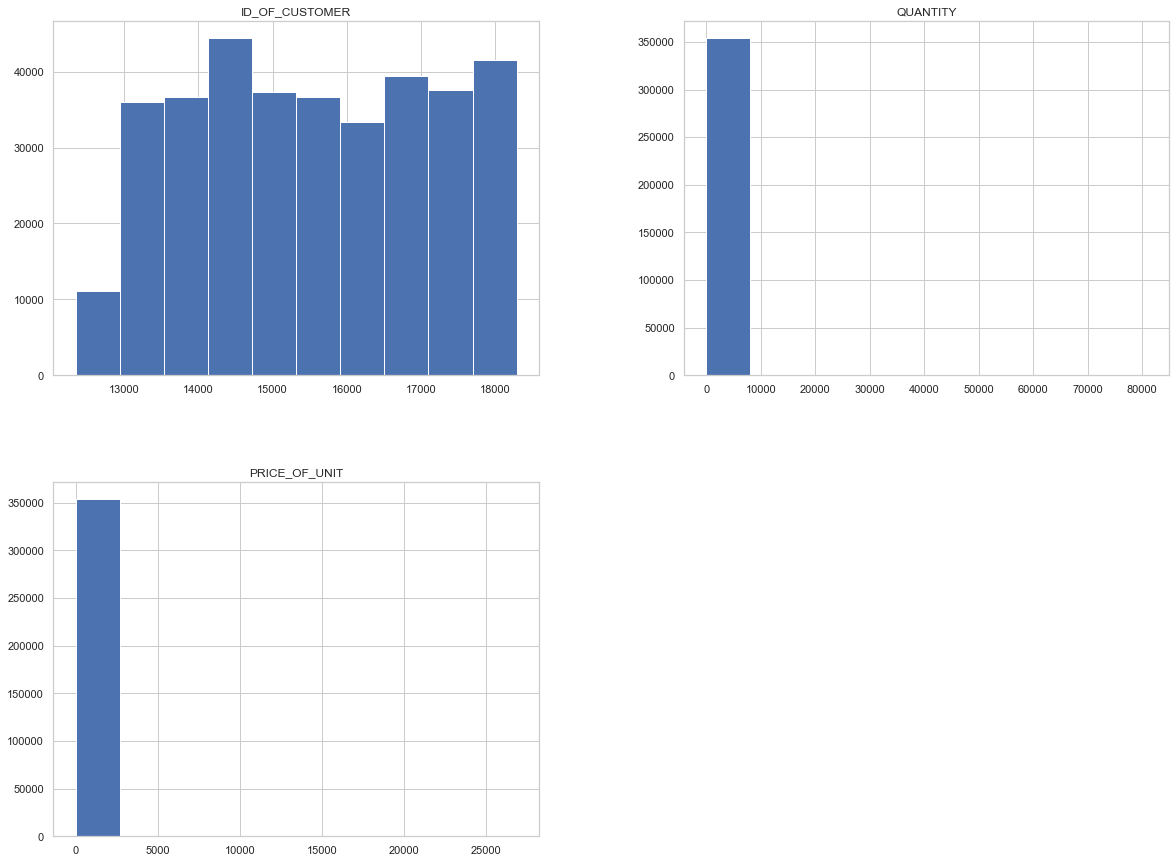

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [26]:
# Calulate total purchase
df2['TOTAL_PURCHASE'] = df2['QUANTITY'] * df2['PRICE_OF_UNIT']
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE
0,17850.0,536365,25/09/2020,6.0,8.415,50.490
1,17850.0,536365,25/09/2020,6.0,11.187,67.122
2,17850.0,536365,25/09/2020,8.0,9.075,72.600
3,17850.0,536365,25/09/2020,6.0,11.187,67.122
4,17850.0,536365,25/09/2020,6.0,11.187,67.122


In [27]:
# Converting Pandas Series to DateTime in a DataFrame
df2['DATE_OF_INVOICE']=pd.to_datetime(df2['DATE_OF_INVOICE'])
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE
0,17850.0,536365,2020-09-25,6.0,8.415,50.490
1,17850.0,536365,2020-09-25,6.0,11.187,67.122
2,17850.0,536365,2020-09-25,8.0,9.075,72.600
3,17850.0,536365,2020-09-25,6.0,11.187,67.122
4,17850.0,536365,2020-09-25,6.0,11.187,67.122


In [28]:
# Extract month and year from InvoiceDate.
df2['MONTH_BY_YEAR'] = df2['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE,MONTH_BY_YEAR
0,17850.0,536365,2020-09-25,6.0,8.415,50.490,Sep-2020
1,17850.0,536365,2020-09-25,6.0,11.187,67.122,Sep-2020
2,17850.0,536365,2020-09-25,8.0,9.075,72.600,Sep-2020
3,17850.0,536365,2020-09-25,6.0,11.187,67.122,Sep-2020
4,17850.0,536365,2020-09-25,6.0,11.187,67.122,Sep-2020


In [29]:
SALES=df2.pivot_table(index=['ID_OF_CUSTOMER'],columns=['MONTH_BY_YEAR'],values='TOTAL_PURCHASE',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2020,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Dec-2021,Feb-2020,Feb-2021,Jan-2020,...,Mar-2020,Mar-2021,May-2020,May-2021,Nov-2020,Nov-2021,Oct-2020,Oct-2021,Sep-2020,Sep-2021
0,12346.0,0.000,0.000,0.000,0.000,254705.880,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,12747.0,0.000,1241.790,0.000,0.000,1025.574,1032.009,0.000,2908.818,0.000,...,0.000,1083.555,0.000,0.000,1000.032,0.000,0.000,0.000,1183.248,0.000
2,12748.0,2729.067,3541.263,9.405,6900.795,2576.013,4693.788,1012.572,3990.558,270.996,...,1549.086,6474.072,2060.157,6448.761,113.751,3299.670,2232.186,7421.436,4433.649,22251.801
3,12749.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,9092.259,0.000,1889.547,0.000,0.000,0.000,2518.098
4,12820.0,0.000,0.000,0.000,1134.408,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,562.518,0.000,0.000,0.000,0.000,0.000


In [30]:
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2020,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Dec-2021,Feb-2020,Feb-2021,Jan-2020,...,Mar-2021,May-2020,May-2021,Nov-2020,Nov-2021,Oct-2020,Oct-2021,Sep-2020,Sep-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,254705.880,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,0.000,1241.790,0.000,0.000,1025.574,1032.009,0.000,2908.818,0.000,...,1083.555,0.000,0.000,1000.032,0.000,0.000,0.000,1183.248,0.000,13846.833
2,12748.0,2729.067,3541.263,9.405,6900.795,2576.013,4693.788,1012.572,3990.558,270.996,...,6474.072,2060.157,6448.761,113.751,3299.670,2232.186,7421.436,4433.649,22251.801,108546.042
3,12749.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,9092.259,0.000,1889.547,0.000,0.000,0.000,2518.098,13499.904
4,12820.0,0.000,0.000,0.000,1134.408,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,562.518,0.000,0.000,0.000,0.000,0.000,3109.722


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLV', ylabel='Density'>

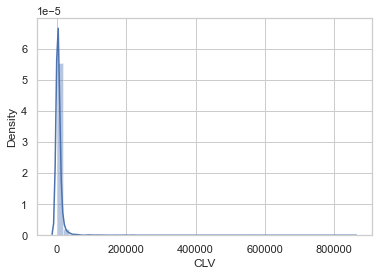

In [31]:
sns.distplot(SALES['CLV'],kde=True)

In [32]:
SALES['CLV'].describe()

count      3920.000000
mean       6108.827978
std       24578.215043
min           0.000000
25%         979.060500
50%        2132.229000
75%        5172.857250
max      850552.098000
Name: CLV, dtype: float64

In [33]:
df3 = SALES[['ID_OF_CUSTOMER','Sep-2021','Aug-2021','Jul-2021','Jun-2021','May-2021','Apr-2021','CLV']]
df3.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,0.000,0.000,2228.754,995.610,0.000,1241.790,13846.833
2,12748.0,22251.801,6900.795,18851.184,3869.151,6448.761,3541.263,108546.042
3,12749.0,2518.098,0.000,0.000,0.000,9092.259,0.000,13499.904
4,12820.0,0.000,1134.408,718.641,0.000,0.000,0.000,3109.722


In [34]:
df4 = pd.DataFrame({'ID_OF_CUSTOMER': SALES['ID_OF_CUSTOMER'],
                    'Sep-2021': SALES['Sep-2021'],
                    'Aug-2021': SALES['Aug-2021'],
                    'Jul-2021': SALES['Jul-2021'],
                    'Jun-2021': SALES['Jun-2021'],
                    'May-2021': SALES['May-2021'],
                    'Apr-2021': SALES['Apr-2021'],
                    'CLV': SALES['CLV']})
df4.head()

,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,0.000,0.000,2228.754,995.610,0.000,1241.790,13846.833
2,12748.0,22251.801,6900.795,18851.184,3869.151,6448.761,3541.263,108546.042
3,12749.0,2518.098,0.000,0.000,0.000,9092.259,0.000,13499.904
4,12820.0,0.000,1134.408,718.641,0.000,0.000,0.000,3109.722


In [35]:
# find out correlation between params
df4.corr()

,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
ID_OF_CUSTOMER,1.000000,-0.014224,0.023552,0.017557,-0.014583,-0.017714,0.013482,0.003167
Sep-2021,-0.014224,1.000000,0.325189,0.509918,0.300718,0.253889,0.210215,0.517859
Aug-2021,0.023552,0.325189,1.000000,0.622018,0.327177,0.309603,0.677312,0.750516
Jul-2021,0.017557,0.509918,0.622018,1.000000,0.234534,0.249261,0.376307,0.724179
Jun-2021,-0.014583,0.300718,0.327177,0.234534,1.000000,0.328747,0.418300,0.467872
May-2021,-0.017714,0.253889,0.309603,0.249261,0.328747,1.000000,0.391340,0.495913
Apr-2021,0.013482,0.210215,0.677312,0.376307,0.418300,0.391340,1.000000,0.642231
CLV,0.003167,0.517859,0.750516,0.724179,0.467872,0.495913,0.642231,1.000000


In [36]:
corr_matrix = df4.corr()
corr_matrix["CLV"].sort_values(ascending=False)

CLV               1.000000
Aug-2021          0.750516
Jul-2021          0.724179
Apr-2021          0.642231
Sep-2021          0.517859
May-2021          0.495913
Jun-2021          0.467872
ID_OF_CUSTOMER    0.003167
Name: CLV, dtype: float64

<AxesSubplot:>

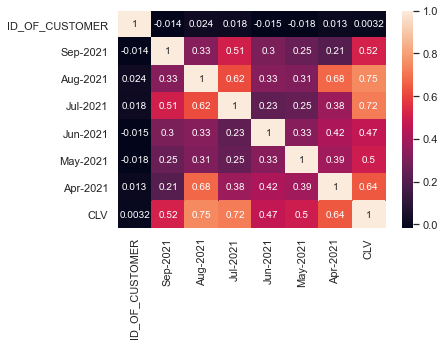

In [37]:
sns.heatmap(df4.corr(),annot=True)

# 4. Modeling

In [38]:
df4.columns

Index(['ID_OF_CUSTOMER', 'Sep-2021', 'Aug-2021', 'Jul-2021', 'Jun-2021',
       'May-2021', 'Apr-2021', 'CLV'],
      dtype='object')

In [39]:
X = df4[ ['Sep-2021', 'Aug-2021', 'Jul-2021', 'Jun-2021','May-2021','Apr-2021'] ]
y = df4[ ['CLV']]

In [40]:
clv_features = [X for i,X in enumerate(X.columns) if i!=6]

In [41]:
import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.786     
Dependent Variable: CLV              AIC:                84348.2979
Date:               2021-10-09 22:46 BIC:                84392.2149
No. Observations:   3920             Log-Likelihood:     -42167.   
Df Model:           6                F-statistic:        2399.     
Df Residuals:       3913             Prob (F-statistic): 0.00      
R-squared:          0.786            Scale:              1.2931e+08
--------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025     0.975] 
--------------------------------------------------------------------
const       981.8549  189.4551   5.1825  0.0000  610.4149  1353.2949
Sep-2021      1.1641    0.0783  14.8656  0.0000    1.0106     1.3177
Aug-2021      1.8467    0.0785  23.5330  0.0000    1.6928     2.0005
Jul-2021      1.7621    0.0535  32.9206  0.0000    1.6571   

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1079.
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:46:52   Log-Likelihood:                -28489.
No. Observations:                2626   AIC:                         5.699e+04
Df Residuals:                    2619   BIC:                         5.703e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        983.8087    256.265      3.839      0.0

In [45]:
print("Precision of linear regression on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Precision of linear regression on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Precision of linear regression on training set: 0.712
Precision of linear regression on test set: 0.885


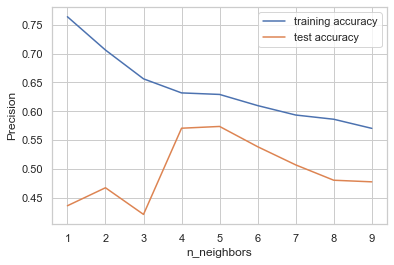

In [46]:
from sklearn.neighbors import KNeighborsRegressor
training_precision = []
test_precision = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set precision
    training_precision.append(knn.score(X_train, y_train))
    # record test set precision
    test_precision.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_precision, label="training accuracy")
plt.plot(neighbors_settings, test_precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [47]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("Precision of K-NN regressor on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Precision of K-NN regressor on test set: {:.3f}".format(knn.score(X_test, y_test)))

Precision of K-NN regressor on training set: 0.629
Precision of K-NN regressor on test set: 0.574


In [48]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [49]:
print("Precision of support vector regressor on training set: {:.2f}".format(svr.score(X_train, y_train)))
print("Precision of support vector regressor on test set: {:.2f}".format(svr.score(X_test, y_test)))

Precision of support vector regressor on training set: -0.03
Precision of support vector regressor on test set: -0.02


In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.12115018 0.25219011 0.02330227 0.02042621 0.56425242 0.01867882]


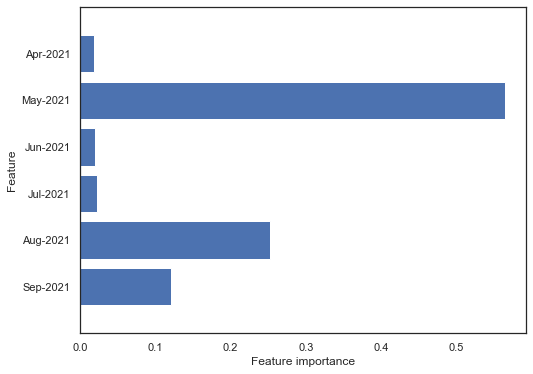

In [52]:
sns.set(style="white")

def plot_feature_importances_clv(model):
    plt.figure(figsize=(8,6))
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clv_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_clv(dt)

In [53]:
print("Precision of decision tree regressor on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Precision of decision tree regressor on test set: {:.3f}".format(dt.score(X_test, y_test)))

Precision of decision tree regressor on training set: 0.766
Precision of decision tree regressor on test set: 0.802


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=42)

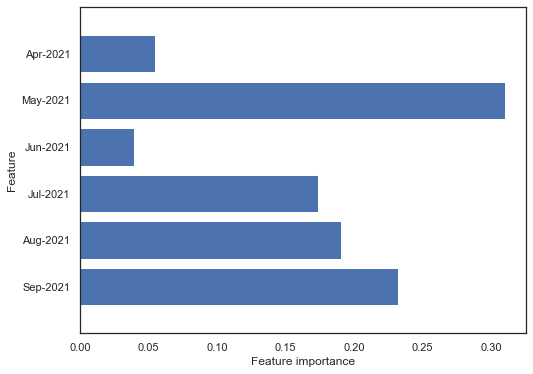

In [55]:
plot_feature_importances_clv(rf)

In [56]:
print("Precision of random forest regressor on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Precision of random forest regressor on test set: {:.3f}".format(rf.score(X_test, y_test)))

Precision of random forest regressor on training set: 0.732
Precision of random forest regressor on test set: 0.615


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=42)

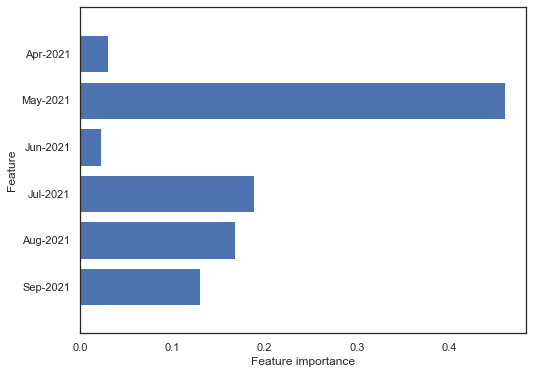

In [58]:
plot_feature_importances_clv(gb)

In [59]:
print("Precision of gradient boosting regressor on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Precision of gradient boosting regressor test set: {:.3f}".format(gb.score(X_test, y_test)))

Precision of gradient boosting regressor on training set: 0.757
Precision of gradient boosting regressor test set: 0.638


# 5. Evaluation

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [61]:
y_pred_regressor = regressor.predict(X_test)

In [62]:
regressor_r = regressor.score(X_test, y_test)
print("Linear Regression R squared:","{:.2%}".format(regressor_r))

Linear Regression R squared: 88.48%


In [63]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print('Linear Regression RMSE: %.4f' % regressor_rmse)

Linear Regression RMSE: 9206.3047


In [64]:
y_pred_knn = knn.predict(X_test)

In [65]:
knn_r = knn.score(X_test, y_test)
print("K-Nearest Neighbors R squared:","{:.2%}".format(knn_r))

K-Nearest Neighbors R squared: 57.37%


In [66]:
knn_mse = mean_squared_error(y_pred_knn, y_test)
knn_rmse = np.sqrt(knn_mse)
print('K-Nearest Neighbors RMSE: %.4f' % knn_rmse)

K-Nearest Neighbors RMSE: 17709.4821


In [67]:
y_pred_svr = svr.predict(X_test)

In [68]:
svr_r = svr.score(X_test, y_test)
print("Support Vector Machine R squared:","{:.2%}".format(svr_r))

Support Vector Machine R squared: -1.65%


In [69]:
svr_mse = mean_squared_error(y_pred_svr, y_test)
svr_rmse = np.sqrt(svr_mse)
print('Support Vector Machine RMSE: %.4f' % svr_rmse)

Support Vector Machine RMSE: 27347.5640


In [70]:
y_pred_dt = dt.predict(X_test)

In [71]:
dt_r = dt.score(X_test, y_test)
print("Decision Tree R squared:","{:.2%}".format(dt_r))

Decision Tree R squared: 80.18%


In [72]:
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)

Decision Tree RMSE: 12074.2777


In [73]:
y_pred_rf = rf.predict(X_test)

In [74]:
rf_r = rf.score(X_test, y_test)
print("Random Forest R squared:","{:.2%}".format(rf_r))

Random Forest R squared: 61.53%


In [75]:
rf_mse = mean_squared_error(y_pred_rf, y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest RMSE: %.4f' % rf_rmse)

Random Forest RMSE: 16823.0625


In [76]:
y_pred_gb = gb.predict(X_test)

In [77]:
gb_r = gb.score(X_test, y_test)
print("Gradient Boosting R squared:","{:.2%}".format(gb_r))

Gradient Boosting R squared: 63.75%


In [78]:
gb_mse = mean_squared_error(y_pred_gb, y_test)
gb_rmse = np.sqrt(gb_mse)
print('Gradient Boosting RMSE: %.4f' % gb_rmse)

Gradient Boosting RMSE: 16329.9813


In [79]:
models = ['Linear Regression','K-Nearest Neighbors', 
          'Support Vector Machine', 'Decision Tree',
          'Random Forest', 'Gradient Boosting']
tests_rmse = [regressor_rmse, knn_rmse, svr_rmse, dt_rmse, rf_rmse, gb_rmse]
tests_r = [regressor_r, knn_r, svr_r, dt_r, rf_r, gb_r]

In [80]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests RMSE": tests_rmse })
compare_models.sort_values(by = "Tests RMSE", ascending = True)

,Algorithms,Tests RMSE
0,Linear Regression,9206.304684
3,Decision Tree,12074.277717
5,Gradient Boosting,16329.981314
4,Random Forest,16823.062452
1,K-Nearest Neighbors,17709.482101
2,Support Vector Machine,27347.564014


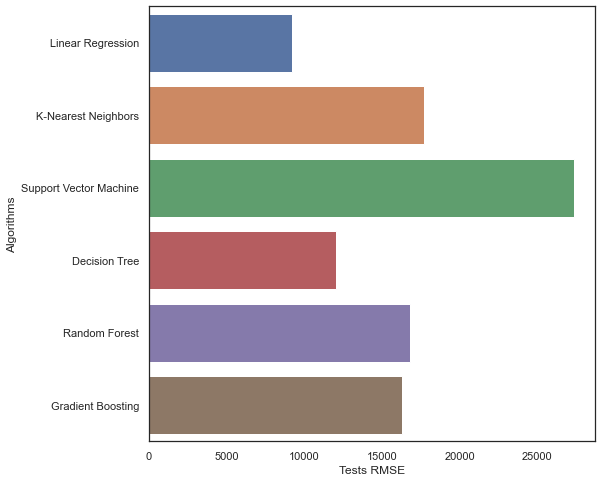

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests RMSE", y = "Algorithms", data = compare_models)
plt.show()

In [82]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests R Squared": tests_r  })
compare_models.sort_values(by = "Tests R Squared", ascending = False)

,Algorithms,Tests R Squared
0,Linear Regression,0.884801
3,Decision Tree,0.801847
5,Gradient Boosting,0.637549
4,Random Forest,0.615330
1,K-Nearest Neighbors,0.573725
2,Support Vector Machine,-0.016518


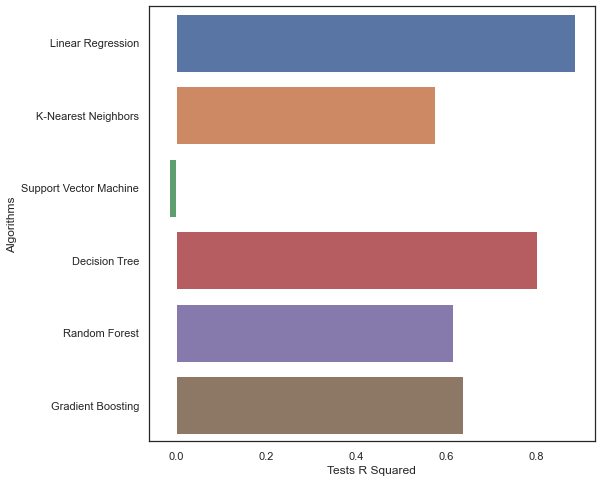

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests R Squared", y = "Algorithms", data = compare_models)
plt.show()

# 6. Deployment

In [84]:
a = float(input("Please enter the revenue from a customer one month ago:"))
b = float(input("Please enter the revenue from a customer two months ago:"))
c = float(input("Please enter the revenue from a customer three months ago :"))
d = float(input("Please enter the revenue from a customer four months ago:"))
e = float(input("Please enter the revenue from a customer five months ago :"))
f = float(input("Please enter the revenue from a customer six months ago:"))
new_data = np.array([a,b,c,d,e,f]).reshape(1,-1)
new_pred=regressor.predict(new_data)
new_pred1 = int(new_pred[0][0])

print("\033[1m The customer CLV is:", '${:,.0f}'.format(new_pred1))

Please enter the revenue from a customer one month ago:22251
Please enter the revenue from a customer two months ago:6900
Please enter the revenue from a customer three months ago :18851
Please enter the revenue from a customer four months ago:3869
Please enter the revenue from a customer five months ago :6448
Please enter the revenue from a customer six months ago:3541
 The customer CLV is: $93,809


In [85]:
ExpectedValue = new_pred1
ExpectedValue

93809

In [86]:
StandardError = int(regressor_rmse)
StandardError 

9206

In [87]:
import scipy.stats as si
def normsinv(x):
    x = si.norm.ppf(x)
    return (x)

In [88]:
alpha = 1 - 0.99
Z = round(abs(normsinv(0.5*alpha)),3)
Z

2.576

In [89]:
Upper = int(ExpectedValue + Z * StandardError)
Upper

117523

In [90]:
Lower = int(ExpectedValue - Z * StandardError)
Lower

70094

In [91]:
print("\033[1m With a confidence level of 99%, the CLV of the Customer is between " '${:,.0f}'.format(Lower),"and",'${:,.0f}.'.format(Upper),"The average value the CLV is " '${:,.0f}.'.format(ExpectedValue))

 With a confidence level of 99%, the CLV of the Customer is between $70,094 and $117,523. The average value the CLV is $93,809.
